# Extract Oxygen Spectrum
***
Do this from using air and nitrogen spectra as well as hydrogen and $H_2O$ spectra

In [2]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [76]:
#Data 
cols = ["wavelength", "intensity"]
nitrogen_data = pd.read_csv("DataFiles/Nitrogen_Test_slit_bigger_300_900_nm_run_1.txt", delimiter="\t", names=cols)
nitrogen_data2 = pd.read_csv("DataFiles/Nitrogen_slow_thin_slit_300_900_nm_run_1.txt", delimiter="\t", names=cols)
air_data = pd.read_csv("DataFiles/test_stand_air.txt", delimiter="\t", names=cols)
air_data2 = pd.read_csv("DataFiles/Air_slow_thin_slit_300_900_nm_run_1.txt", delimiter="\t", names=cols)


In [36]:
np.median(air_data["intensity"].values[-20:])

0.0047

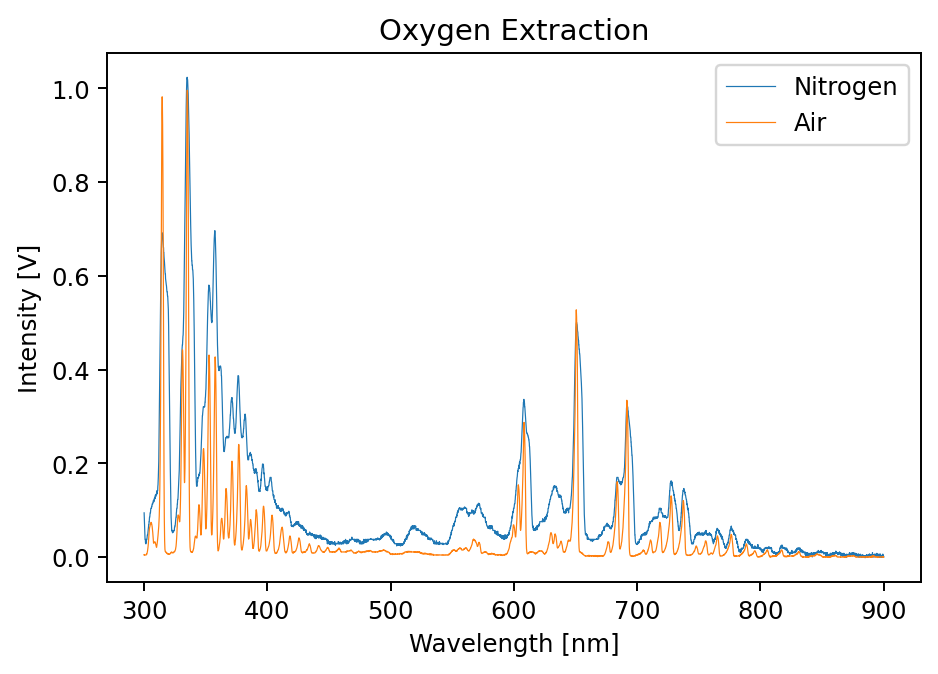

In [43]:
plt.figure(dpi=175)
plt.title("Oxygen Extraction")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")

plt.plot(nitrogen_data["wavelength"], 
         (nitrogen_data["intensity"]-np.median(nitrogen_data["intensity"].values[:10]))/0.5, 
         lw=.5, label="Nitrogen")
plt.plot(air_data["wavelength"], 
         (air_data["intensity"]-np.median(air_data["intensity"].values[-20:]))/2.2, 
         lw=.5, label="Air")
plt.legend()

#plt.ylim(0,0.5)

plt.show()

In [79]:
np.median(nitrogen_data2["wavelength"].values[-20:])

301.3125

In [69]:
np.max(air_data2["intensity"].values)

0.4811

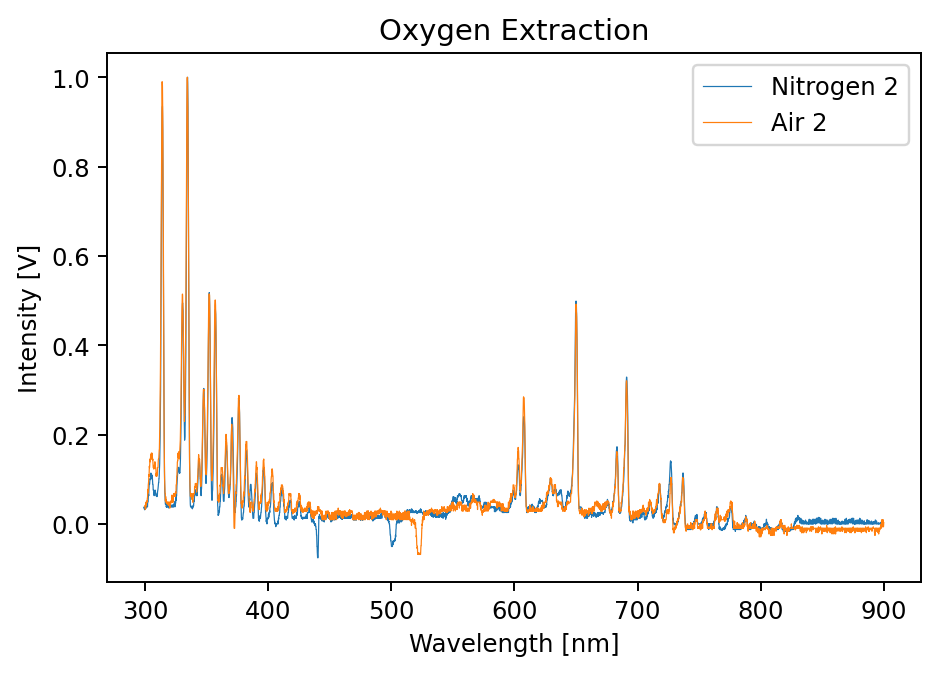

In [80]:
plt.figure(dpi=175)
plt.title("Oxygen Extraction")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")

plt.plot(nitrogen_data2["wavelength"]-1, 
         (nitrogen_data2["intensity"]-np.median(nitrogen_data2["intensity"].values[:20]))/np.max(nitrogen_data2["intensity"].values - np.median(nitrogen_data2["intensity"].values[:20])), 
         lw=.5, label="Nitrogen 2")
plt.plot(air_data2["wavelength"], 
         (air_data2["intensity"]-np.median(air_data2["intensity"].values[-20:]))/np.max(air_data2["intensity"].values - np.median(air_data2["intensity"].values[-20:])), 
         lw=.5, label="Air 2")
plt.legend()

#plt.xlim(550,650)
#plt.ylim(0,0.5)

plt.show()

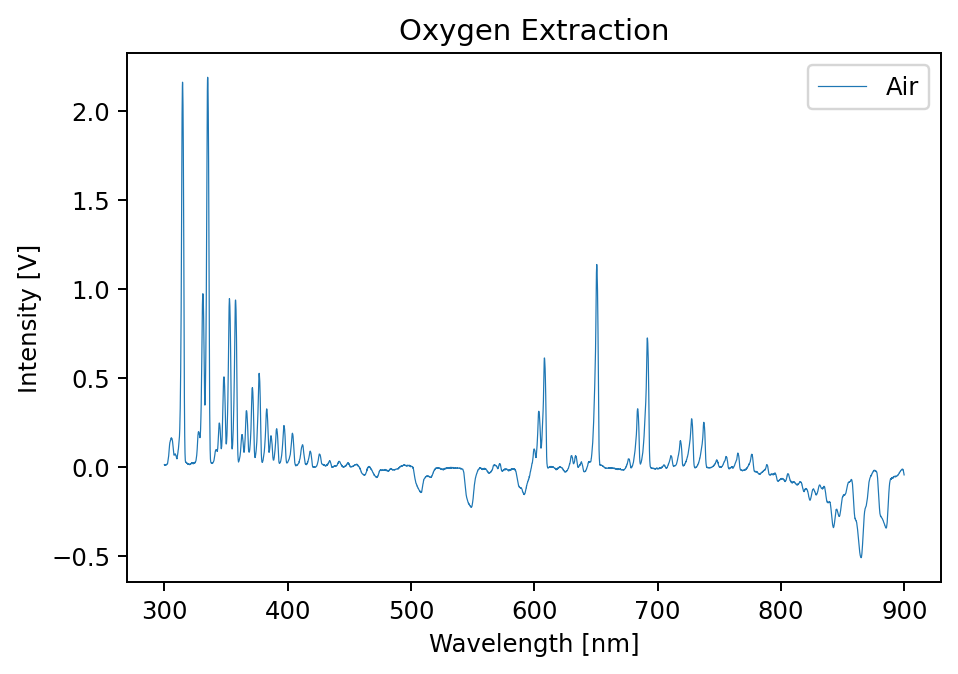

In [17]:
plt.figure(dpi=175)
plt.title("Oxygen Extraction")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")

#plt.plot(nitrogen_data["wavelength"], nitrogen_data["intensity"], lw=.5, label="Nitrogen")
plt.plot(air_data["wavelength"], (air_data["intensity"]+0.03) - (nitrogen_data["intensity"]), lw=.5, label="Air")
plt.legend()

#plt.ylim(0,0.5)

plt.show()

## Hydrogen & Water

In [83]:
hydrogen_data = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point3_300_900_nm_run_2.txt", delimiter="\t", names=cols)
water_data = pd.read_csv("DataFiles/Water_Test_slit_bigger_300_900_nm_run_1.txt", delimiter="\t", names=cols)

hydrogen_data2 = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point3_300_900_nm_run_2.txt", delimiter="\t", names=cols)
water_data2 = pd.read_csv("DataFiles/Water_Test_slit_bigger_300_900_nm_run_1.txt", delimiter="\t", names=cols)

In [86]:
peaks, properties = find_peaks(water_data["intensity"], height=0, prominence=.12, distance=50, width=5)#, threshold=12, distance=1)#, width=2)

peaks

water_data["wavelength"][peaks]

893     411.625
1307    463.375
2666    633.250
3637    754.625
Name: wavelength, dtype: float64

In [161]:
water_data["wavelength"][peaks].values[-1]+23

777.625

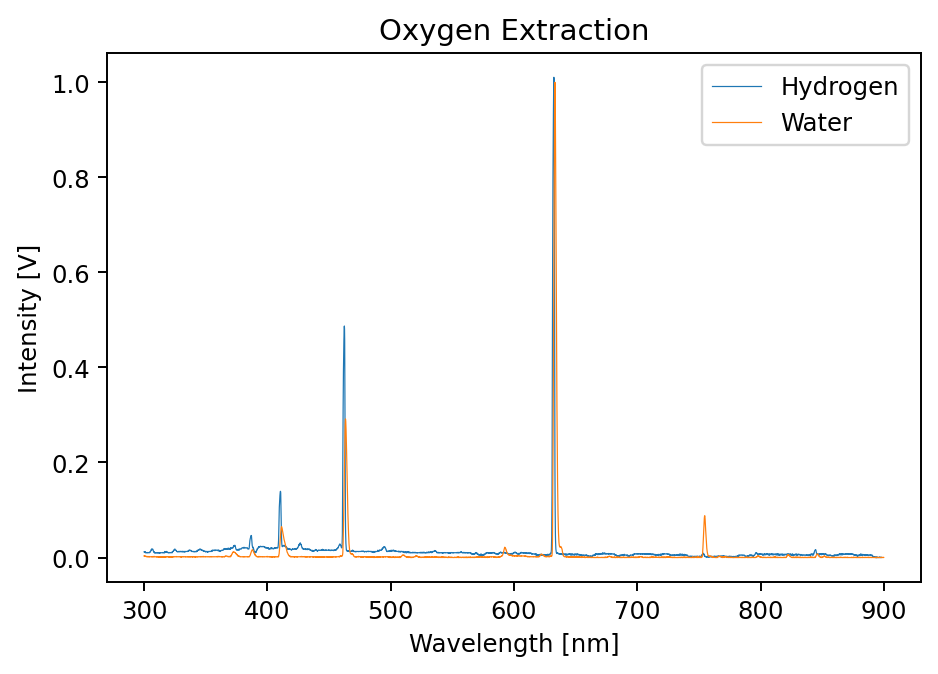

In [90]:
plt.figure(dpi=175)
plt.title("Oxygen Extraction")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")

plt.plot(hydrogen_data["wavelength"]+23*0, 
         (hydrogen_data["intensity"]-np.median(hydrogen_data["intensity"].values[:20]))/np.max(hydrogen_data["intensity"].values - np.median(hydrogen_data["intensity"].values[-20:])), 
         lw=.5, label="Hydrogen")
plt.plot(water_data["wavelength"]+23*0, 
         (water_data["intensity"]-np.median(water_data["intensity"].values[-20:]))/np.max(water_data["intensity"].values - np.median(water_data["intensity"].values[-20:])), 
         lw=.5, label="Water")
#plt.plot(water_data["wavelength"][peaks], water_data["intensity"][peaks], "x")#, label=raw_data["wavelength"][peaks])

plt.legend()

#plt.xlim(550,650)
#plt.ylim(0,0.5)

plt.show()

In [135]:
len(hydrogen_data["wavelength"])

4784

In [136]:
len(water_data.iloc[1:-15,:]["wavelength"])#.min()

4784

In [122]:
#np.array
((water_data["intensity"]-np.median(water_data["intensity"].values[-20:]))/np.max(water_data["intensity"].values - np.median(water_data["intensity"].values[-20:])))[1:-15]

1       0.003312
2       0.003312
3       0.003312
4       0.002748
5       0.003312
          ...   
4780    0.000000
4781    0.000000
4782    0.000000
4783    0.000000
4784    0.000247
Name: intensity, Length: 4784, dtype: float64

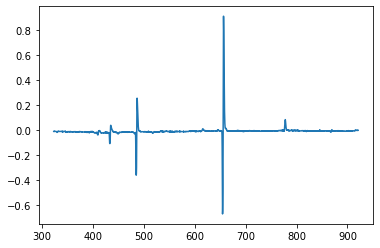

In [158]:


plt.plot(water_data["wavelength"].iloc[1:-15]+23,
         ((water_data["intensity"]-np.median(water_data["intensity"].values[-20:]))/np.max(water_data["intensity"].values - np.median(water_data["intensity"].values[-20:]))).values[0:-16] - np.flip((hydrogen_data["intensity"]-np.median(hydrogen_data["intensity"].values[:20]))/np.max(hydrogen_data["intensity"].values - np.median(hydrogen_data["intensity"].values[-20:]))))


In [151]:
((water_data["intensity"]-np.median(water_data["intensity"].values[-20:]))/np.max(water_data["intensity"].values - np.median(water_data["intensity"].values[-20:]))).values[1:-15] - (hydrogen_data["intensity"]-np.median(hydrogen_data["intensity"].values[:20]))/np.max(hydrogen_data["intensity"].values - np.median(hydrogen_data["intensity"].values[-20:])) 

0       0.003312
1       0.003312
2       0.003312
3       0.001937
4       0.003312
          ...   
4779   -0.011465
4780   -0.012330
4781   -0.011465
4782   -0.011032
4783   -0.011651
Name: intensity, Length: 4784, dtype: float64